<a href="https://colab.research.google.com/github/yoobyoungcheol/AIstudy24/blob/master/%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 사진이나 이미지 동영상 등은 대채적으로 용량이 커서 보관하기 힘들기 때문에
# 주성분만 분석해서 가지고 있으면 디스트 용량 등에 이로움이 있다. (차원축소 알고리즘)
#   데이터가 가진 속성을 특성이라고함 (사진에 특성 : R(빨강)G(초록)B(파랑)K(검정).A(필터))
#   -> 과일사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있다. -> 차원(dimension : 디멘션)

In [ ]:
# 특성이 많으면 선형모델의 성능이 높아지고 훈련데이터에 쉽게 과대적합이된다
# 차원축소 : 데이터를 가장 잘 나타내는 일부 특성을 선택해여 데이터 크기를 줄이고 지도학습 모델의 성능을 향상시키기 위함

# https://ddongwon.tistory.com/114
# 주성분분석(PCA(Prindipal Component Analysis))
#       줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수 도 있어야 한다

https://ddongwon.tistory.com/114

In [1]:
# 주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는것으로 이해(분산 : 데이터가 널리 퍼져있는 정도)
# -> 데이터를 잘 표현하는 벡터?

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-01-08 05:50:57--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-01-08 05:50:58--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-01-08 05:50:58--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

from sklearn.decomposition import PCA # 주성분 분석 알고리즘 사용
# 사이킷런의 decomposition 모듈 아래 PCA 클래스로 활용

pca = PCA(n_components=50)   # PCA 클래스를 만들 때 주성분의 개수를 지정함 50
pca.fit(fruits_2d)          # 비지도 학습으로 타깃제외 학습

PCA(n_components=50)

In [5]:
print(pca.components_.shape)
# 50개의 속성에 10000(100*100개의 특성 개수

(50, 10000)


In [6]:
import matplotlib.pyplot as plt
# 배열을 값을 이용해서 이미지로 출력해주는 메서드
def draw_fruits(arr, ratio=1):    # ratio= 비율 비
    n = len(arr)  # n은 샘플 개수입니다
    # 한줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio),squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

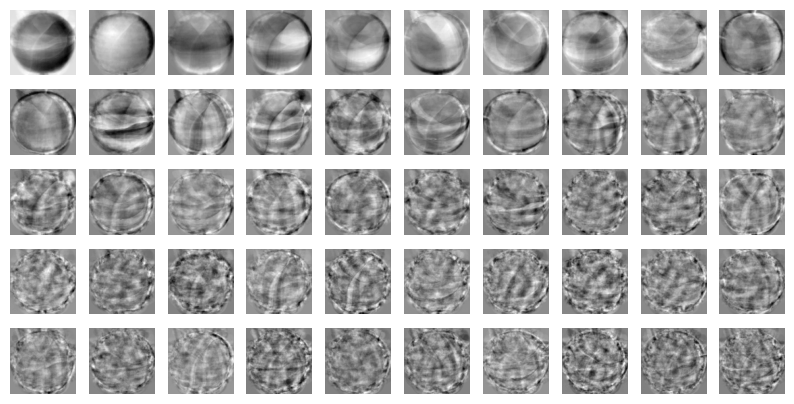

In [7]:
draw_fruits(pca.components_.reshape(-1,100,100))
# 주성분은 원본데이터를 투영하여 특성의 개수를 만들어 냄
# 이 주성분은 원본 데이터세어 가장 분산이 큰 방향을 순서대로 나타낸 것
# 데이터셋에 있는 어떤 특징을 잡아낸 것 처럼 생각해도 됨

In [8]:
# 주성분을 찾았으니 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일수 있음
#       -> 원본의 분해

# transform() 매서드를 사용해서 원본데이터의 차원을 줄여본다
fruits_pca = pca.transform(fruits_2d)
print(fruits_2d.shape)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [10]:
# 10,000개의 특성을 50개로 줄였으니 어느정도 손실이 발생할 수 있다.
# 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 떄문에
# 원본데이터를 상당 부분 재구성이 가능하다
# 원본 데이터의 재구성 -> inverse_transform()
fruits_inverse = pca.inverse_transform(fruits_pca) # 원본처럼 재구성
print(fruits_inverse.shape) # 50개의 특성을 다시 10,000개로 복원

(300, 10000)


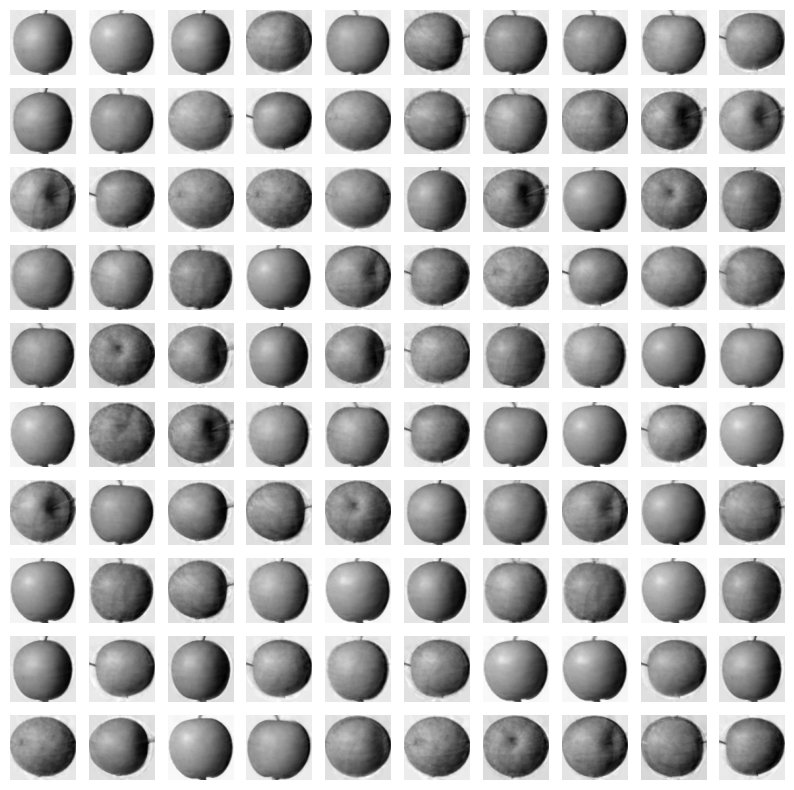

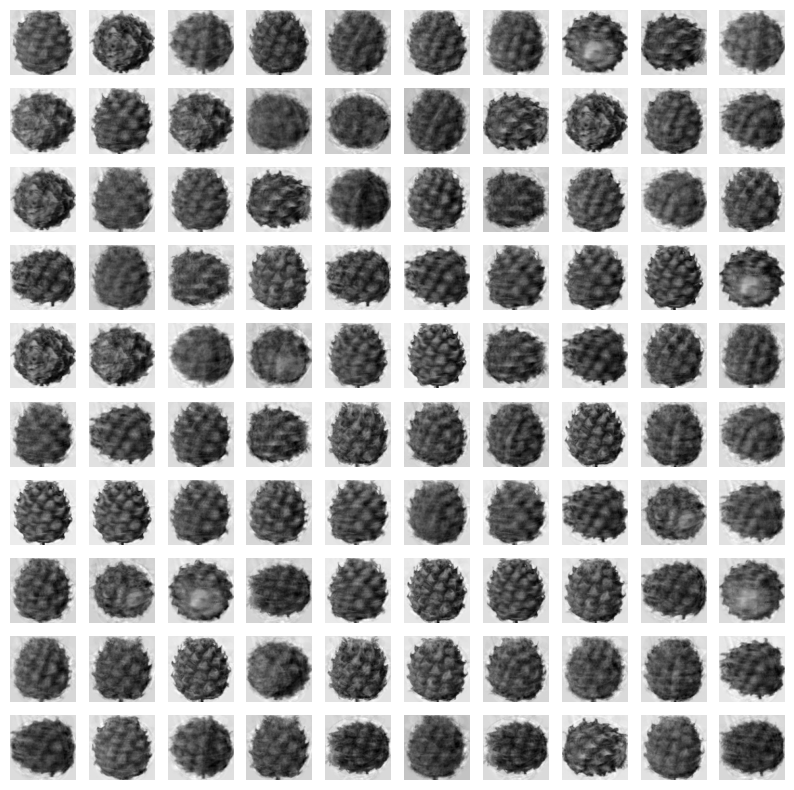

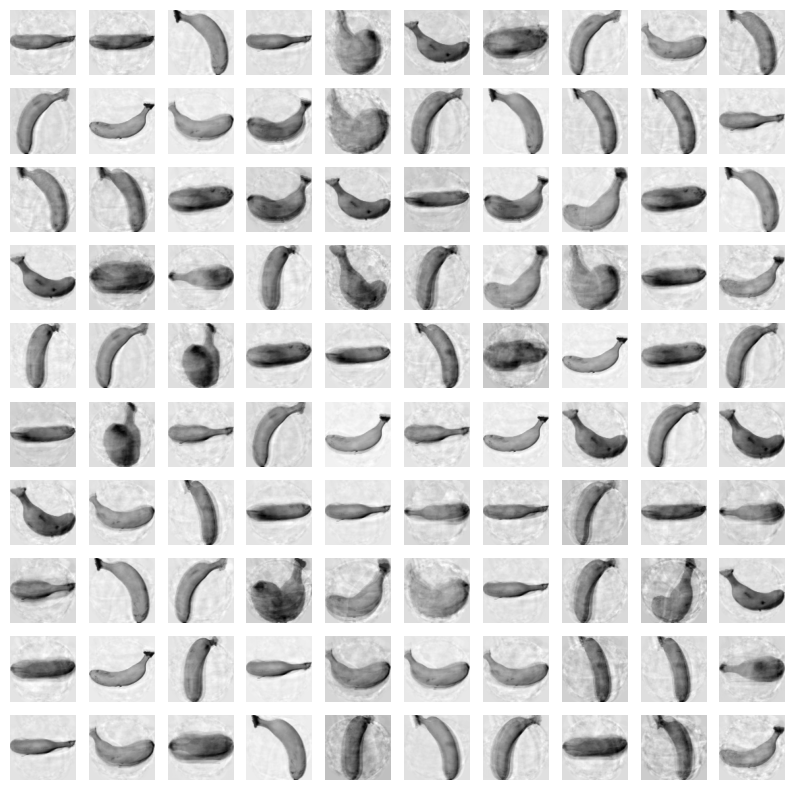

In [12]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [14]:
# 거의 모든 파일이 잘 복원된듯 보인다 특징을 잘 잡아낸 것 같고
# 일부 흐리고 번진 부분도 있지만 중요한 특성은 아님
# 불과 50개의 특성을 10,000개로 늘린 것을 감안하면 성공적인듯 보인다.
# 만약 주성분을 최대로 사용했다면 완벽하게 원본데이터를 재구성할 수 있을 것이다.
# 50개의 특성은 얼마나 분산을 보존하고 있을까를 알아보자

# 설명된 분산(explained variance) : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
# PCA클래스의 explained_variance_ratio_ 에 주성분의 설명된 분산 비율이 기록되어 있다
# 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율
print(np.sum(pca.explained_variance_ratio_))
# 92%가 넘는 분산을 유지하고 있음 (이미지 품질)

0.9215180830855694


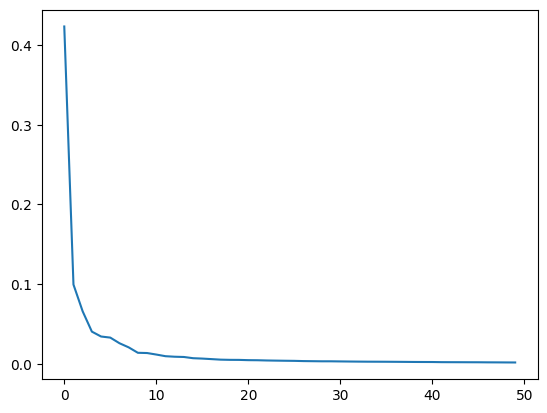

In [15]:
plt.plot(pca.explained_variance_ratio_)
# 그래프의 처음 10개가 주성분의 대부분을 표현하고 있음

In [16]:
# 위에 만든 주성분으로 지도학습 모델에 적용 해보자
# 전에 사용했던 로지스틱 회귀 모델을 사용

from sklearn.linear_model import LogisticRegression
# 사이킷런의 로지스틱클래스

lr = LogisticRegression()

# 지도학습 모델을 사용하기 위해 타깃을 생성한다
# 사과 0 , 파앤애플 1 , 바나나 2
target = np.array([0]*100+[1]*100+[2]*100)  # 정답파일 생성
# 파이썬 리스트에 정수를 곱하면 리스트 안의 원소를 정수만큼 반복함
# 100개의 0, 100개의 1, 100개의 2로 이루어진 타깃데이터를 만듬

In [17]:
from sklearn.model_selection import cross_validate # cross_validate 크로스 검증

scores = cross_validate(lr, fruits_2d, target) # fruits_2d 원본데이터를 사용해봄
print(np.mean(scores['test_score']))    # 99%의 과대적합됨
# 특성이 10000개나 되기 때문에 300개의 샘플에서는 과대적합 모델이 됨
print(np.mean(scores['fit_time']))      # 1.92초 정도 소요됨

0.9966666666666667
1.9266883850097656


In [18]:
scores = cross_validate(lr,fruits_pca,target)   #  fruits_pca : PCA로 축소한 자료사용
print(np.mean(scores['test_score']))   # 99%의 과대적합됨 -> 위와 동일
print(np.mean(scores['fit_time']))      # 0.02초로 빠르게 처리됨
# 결론 속도가 빠르고 용량도 적다
# PCA로 훈련 데이터의 차원을 축소하면 저장 공간과 시간을 절약할 수 있다.

0.9966666666666667
0.02258763313293457


In [19]:
# 앞에서는 PCA클래스를 사용할때 n_components 매개변수에 주성분 개수를 50개로 지정해주었다

# 이 대신 비율로 줄 수도 있다. 50%

pca = PCA(n_components=0.5) # 주성분 50% (0~1사이의 값을 실수로 입력)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [21]:
print(pca.n_components_)
# 2개의 주성분으로 2개의 특성만으로 원본데이터의 분산 50%를 표현할 수 있다.

2


In [24]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)  #  300개의 요소의 2개의 특성

(300, 2)


In [25]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))    # 99%과대적합 위와 비슷
print(np.mean(scores['fit_time']))      # 경과시간이 약간 증가함

0.9933333333333334
0.05003652572631836


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

반복 횟수가 부족하다는 경고문

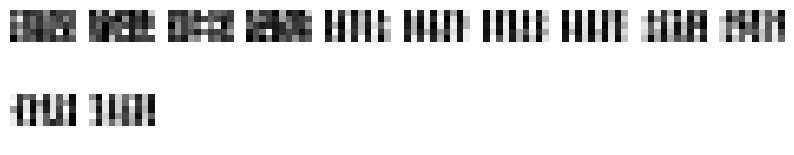

In [40]:
draw_fruits(fruits_pca.reshape(-1,5,10))

In [41]:
from sklearn.cluster import KMeans
# 차원 축소된 데이터를 사용하여 k-평균 알고리즘으로 클러스터를 찾아봄
km = KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [42]:
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


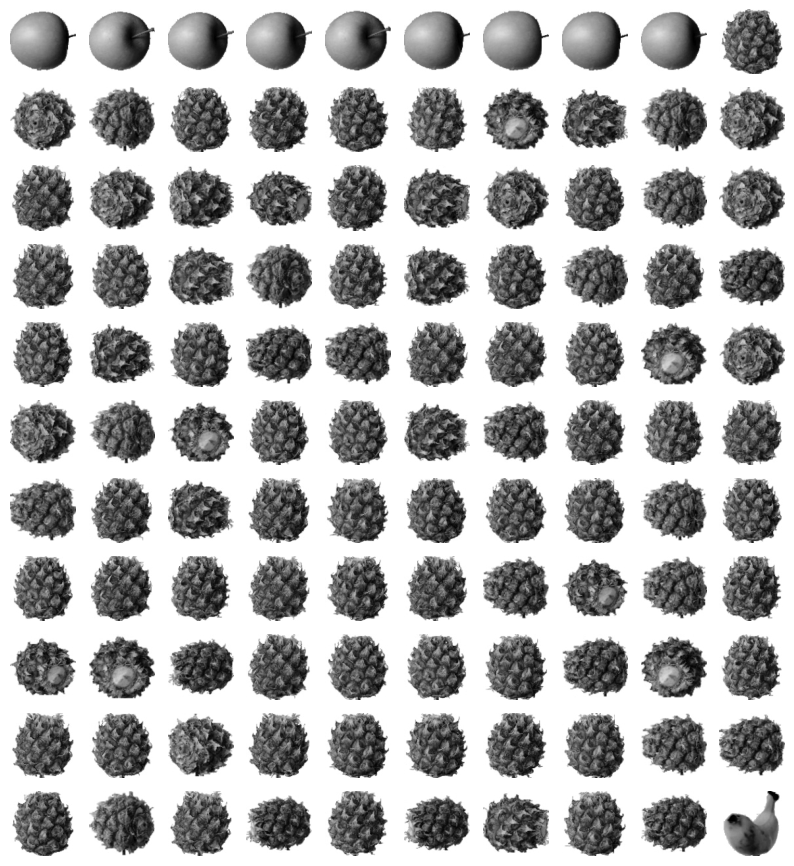

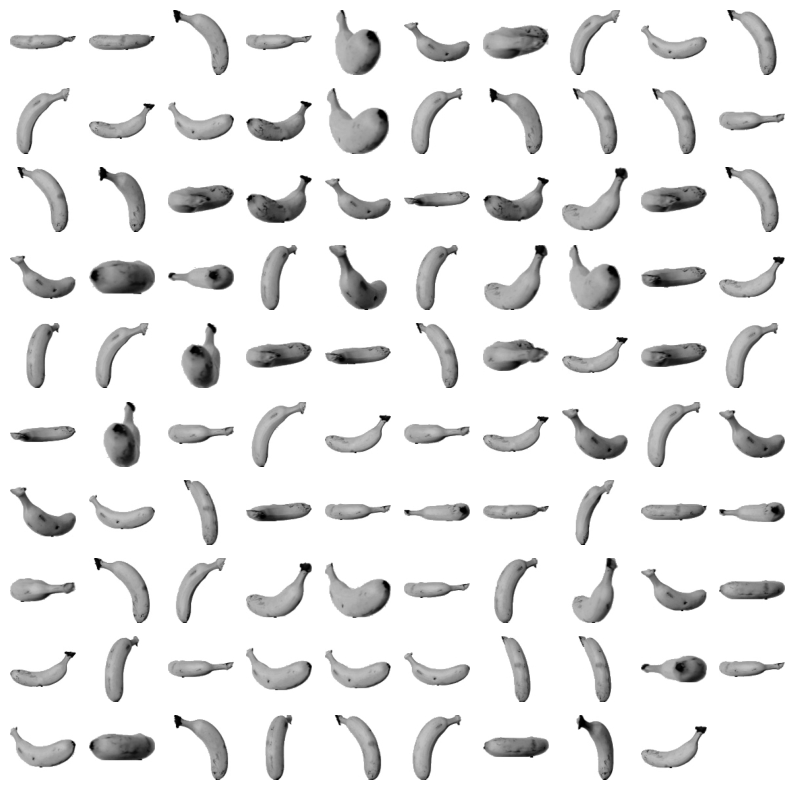

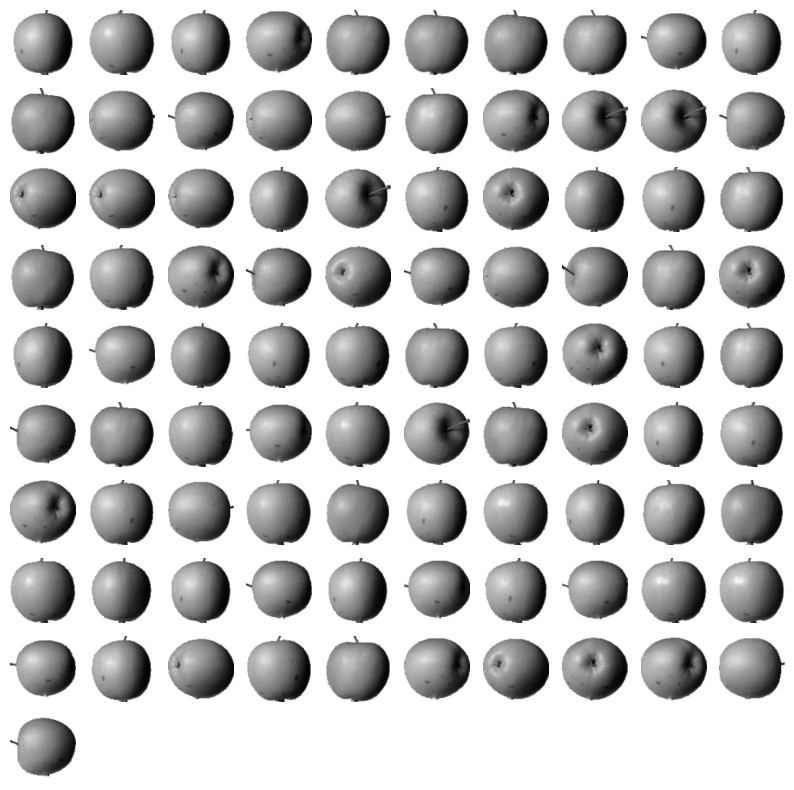

In [43]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")
# KMeans가 찾은 레이블을 사용해 과일 이미지를 출력


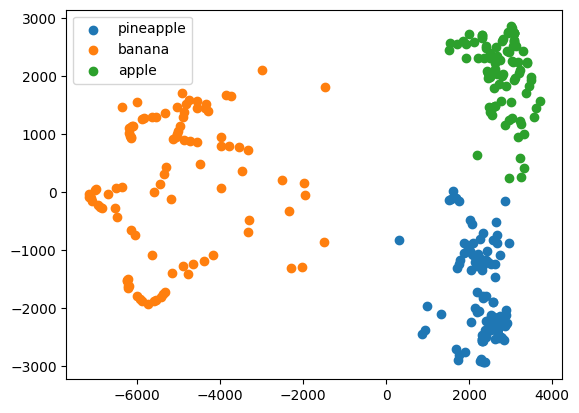

In [44]:
# 훈련데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화가 가능학다
# 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다
# fruits_pca 데이터가 2개의 특성으로 있기 때문에 2차원으로 표현할 수 있다
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
                    # km.labels_ 를 사용해 클러스터별로 나누어 산점도를 그림
    plt.scatter(data[:,0],data[:,1])
plt.legend(['pineapple','banana','apple']) # 범례 표시
plt.show()